In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# providing all the necessary files needed for assesment 
togo_df = pd.read_csv (r"C:\Users\Ramlla\Desktop\Solar farm analysis\data\togo-dapaong_qc.csv")
benin_df =pd.read_csv(r"C:\Users\Ramlla\Desktop\Solar farm analysis\data\benin-malanville.csv")
sierra_df =pd.read_csv(r"C:\Users\Ramlla\Desktop\Solar farm analysis\data\sierraleone-bumbuna.csv")
combined_df = pd.read_csv(r"C:\Users\Ramlla\Desktop\cleaned_combined_data.csv")


# # Assesment on distribution of global horizontal irradiance- Histogram

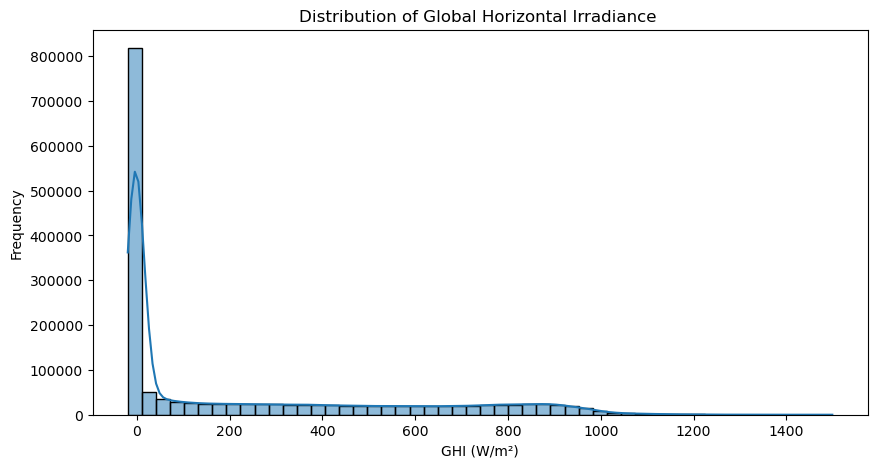

In [15]:
plt.figure(figsize=(10, 5))

# Create a histogram of the Global Horizontal Irradiance (GHI) with a Kernel Density Estimate (KDE) overlay
# with an interval of 50

sns.histplot(combined_df['GHI'], kde=True, bins=50)
#Setting up the plot

plt.title('Distribution of Global Horizontal Irradiance ')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.savefig(r'C:\Users\Ramlla\Desktop\Solar farm analysis\result\Distribution of Global Horizontal Irradiance.png', dpi=300)
plt.show()


# Correlations

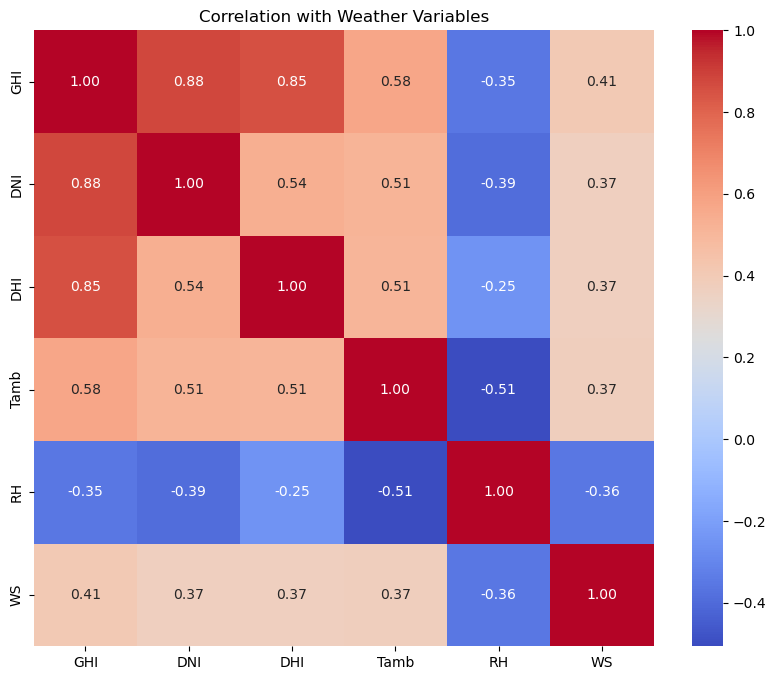

In [13]:
# Calculate correlations with weather variables
weather_corr = combined_df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Weather Variables')
plt.savefig(r'C:\Users\Ramlla\Desktop\Solar farm analysis\result\Correlation with weather variables.png', dpi=300)
plt.show()



# Time series analysis

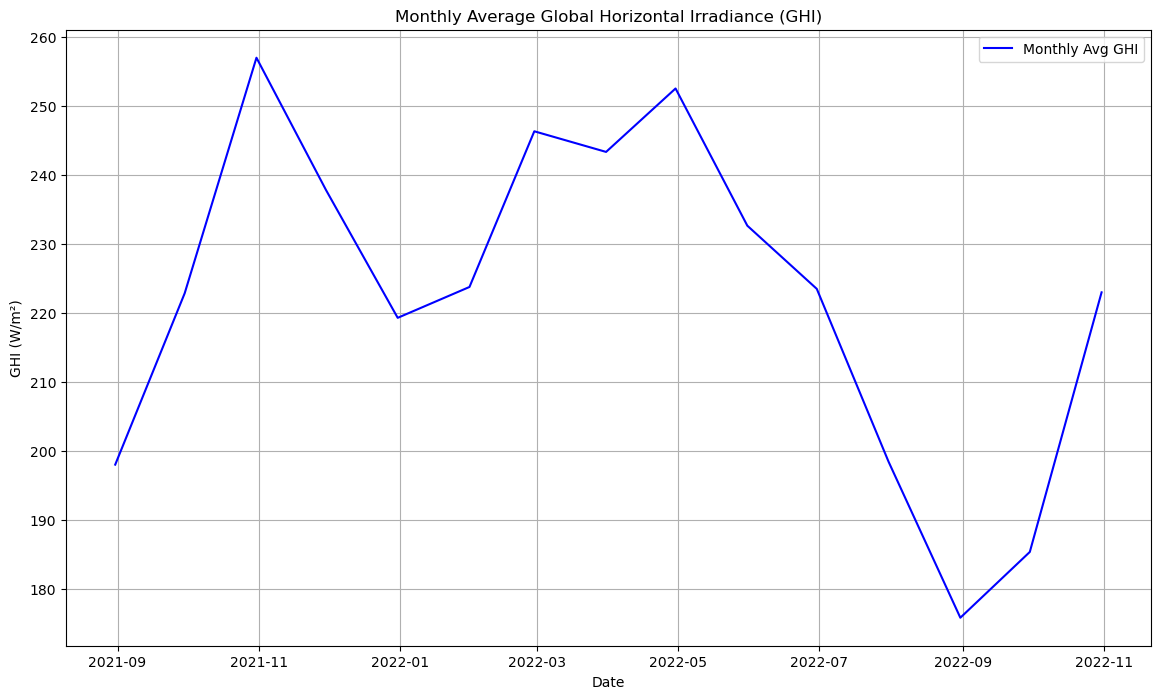

In [16]:
# Convert Timestamp to datetime
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

# Resample the data to a monthly frequency and calculate the mean for each month
monthly_avg = combined_df.resample('M', on='Timestamp').mean()

plt.figure(figsize=(14, 8))
plt.plot(monthly_avg.index, monthly_avg['GHI'], label='Monthly Avg GHI', color='blue')
plt.title('Monthly Average Global Horizontal Irradiance (GHI)')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\Ramlla\Desktop\Solar farm analysis\result\Monthly average GHI.png', dpi=300)
plt.show()
